In [218]:
%reset -f

In [97]:
######### ######### ######### ######### ######### ######### ######### #########
Omega = 1
Lambda = 0

obj_coef = -Omega * all_dijs - Lambda * all_prb0s

result = linprog(obj_coef, A_eq=A_eq, b_eq=b_eq)
opt_xs = result.x
opt_pairs = np.round(result.x) # Pairs
# opt_distortion = -result.fun # Value of the distortion

opt_dijs = opt_pairs * all_dijs
opt_distortion = sum(opt_dijs)
opt_db = 10 * np.log10(opt_distortion)

opt_prb0s = opt_pairs * all_prb0s
opt_prb0 = sum(opt_prb0s)
if opt_prb0 != 1 and opt_prb0 != 0:
    opt_entropy = -opt_prb0 * np.log2(opt_prb0)-(1-opt_prb0)*np.log2(1-opt_prb0)
else:
    opt_entropy = 0

k = 0
xx = np.zeros([cells_num, cells_num])
for i in range(0,cells_num):
    for j in range(i+1,cells_num):
        xx[i,j] = opt_pairs[k]
        k +=1
        
lp_pairs_show = np.array(np.where(xx == 1))

# print(opt_distortion)
# print(lp_pairs_show)
print('lambda0_DE(dB)',opt_db)
print('lambda0_HS0',opt_entropy)

# Optimized MSB bit plane
dual_xx = xx + np.transpose(xx)

lp_msb_plane = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        lp_pair_val = np.array(np.where(dual_xx[true_val]==1))
        if all_counts[true_val] >= all_counts[lp_pair_val]:
            lp_msb_plane[i][j] = 0
        else:
            lp_msb_plane[i][j] = 1

lp_msb_plane255 = lp_msb_plane*255
lp_msb_uint8 = lp_msb_plane255.astype(np.uint8)
cv2.imshow('msb_255_lam0', lp_msb_uint8)
filename = 'msb_255_lam0.webp'
cv2.imwrite(filename, lp_msb_uint8)
cv2.waitKey(1000)
# At Eve ######### ######### ######### ######### ######### ######### ######### #########
msb0_part = lp_pairs_show[0]
msb1_part = lp_pairs_show[1]

eve_msb0 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        if intensities[i][j] in msb1_part:
            position = np.where(msb1_part == intensities[i][j]) # Set all MSBs zero
            eve_msb0[i][j] = msb0_part[position]

diff1 = (intensities -  eve_msb0)
dif1 = diff1.astype(np.float)
eve_dist1_mat = dif1**2
eve_dist1 = eve_dist1_mat.sum()/occurance_sum

cv2.imshow('eve_msb0_lam0', eve_msb0)
filename = 'eve_msb0_lam0.webp'
cv2.imwrite(filename, eve_msb0)
cv2.waitKey(1000)

eve_msb1 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        if intensities[i][j] in msb0_part:
            position = np.where(msb0_part == intensities[i][j]) # Set all MSBs one
            eve_msb1[i][j] = msb1_part[position]

diff2 = (intensities -  eve_msb1)
dif2 = diff2.astype(np.float)
eve_dist2_mat = dif2**2
eve_dist2 = eve_dist2_mat.sum()/occurance_sum

cv2.imshow('eve_msb1_lam0', eve_msb1)
filename = 'eve_msb1_lam0.webp'
cv2.imwrite(filename, eve_msb1)
cv2.waitKey(1000)

eve_dist = 0.5 * (eve_dist1 + eve_dist2)
eve_dist_db = 10*np.log10(eve_dist)
print('eve_distortion_msb_lam0', eve_dist_db)

lambda0_DE(dB) 40.53895673887419
lambda0_HS0 0.06425772669396125
eve_distortion_msb_lam0 39.04702664160959


In [99]:
np.shape(lp_pairs_show)

(2, 91)

In [147]:
bbb = np.sort(opt_xs)
bbb[-1000:-1]

array([0.01383333, 0.01383334, 0.01383337, 0.01383338, 0.01383338,
       0.01383338, 0.01383339, 0.01383339, 0.0138334 , 0.01383342,
       0.01383342, 0.01383343, 0.01383343, 0.01383343, 0.01383344,
       0.01383344, 0.01383345, 0.01383346, 0.01383348, 0.01383349,
       0.0138335 , 0.0138335 , 0.01383353, 0.01383354, 0.01383355,
       0.01383355, 0.0138336 , 0.0138336 , 0.01383363, 0.01383363,
       0.01383364, 0.01383367, 0.01383368, 0.01383369, 0.01383369,
       0.01383372, 0.01383373, 0.01383373, 0.01383376, 0.01383376,
       0.01383376, 0.01383379, 0.01383379, 0.01383379, 0.0138338 ,
       0.01383382, 0.01383383, 0.01383385, 0.01383386, 0.01383387,
       0.01383388, 0.0138339 , 0.0138339 , 0.01383391, 0.01383391,
       0.01383393, 0.01383393, 0.01383395, 0.01383396, 0.01383397,
       0.013834  , 0.013834  , 0.013834  , 0.01383402, 0.01383403,
       0.01383403, 0.01383404, 0.01383405, 0.01383405, 0.01383405,
       0.01383407, 0.01383409, 0.01383409, 0.01383409, 0.01383

In [108]:
aaa = np.sort(opt_pairs)
aaa[-92:-1]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [86]:
cv2.destroyAllWindows()

In [ ]:
Omega = 1
Lambda = 1000

obj_coef = -Omega * all_dijs - Lambda * all_prb0s

result = linprog(obj_coef, A_eq=A_eq, b_eq=b_eq)
opt_xs = result.x
opt_pairs = np.round(result.x) # Pairs
# opt_distortion = -result.fun # Value of the distortion

opt_dijs = opt_pairs * all_dijs
opt_distortion = sum(opt_dijs)
opt_db = 10 * np.log10(opt_distortion)

opt_prb0s = opt_pairs * all_prb0s
opt_prb0 = sum(opt_prb0s)
if opt_prb0 != 1 and opt_prb0 != 0:
    opt_entropy = -opt_prb0 * np.log2(opt_prb0)-(1-opt_prb0)*np.log2(1-opt_prb0)
else:
    opt_entropy = 0

k = 0
xx = np.zeros([cells_num, cells_num])
for i in range(0,cells_num):
    for j in range(i+1,cells_num):
        xx[i,j] = opt_pairs[k]
        k +=1
        
lp_pairs_show = np.array(np.where(xx == 1))
# print(lp_pairs_show)
# print(opt_distortion)
print('lambda1000_DE(dB)',opt_db)
print('lambda1000_HS0', opt_entropy)

# Optimized MSB bit plane
dual_xx = xx + np.transpose(xx)

lp_msb_plane = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        lp_pair_val = np.array(np.where(dual_xx[true_val]==1))
        if all_counts[true_val] >= all_counts[lp_pair_val]:
            lp_msb_plane[i][j] = 0
        else:
            lp_msb_plane[i][j] = 1

lp_msb_plane255 = lp_msb_plane*255
lp_msb_uint8 = lp_msb_plane255.astype(np.uint8)
cv2.imshow('msb_255_lam1000', lp_msb_uint8)
filename = 'msb_255_lam1000.webp'
cv2.imwrite(filename, lp_msb_uint8)
cv2.waitKey(1000)
# At Eve ######### ######### ######### ######### ######### ######### ######### #########
msb0_part = lp_pairs_show[0]
msb1_part = lp_pairs_show[1]

eve_msb0 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        if intensities[i][j] in msb1_part:
            position = np.where(msb1_part == intensities[i][j]) # Set all MSBs zero
            eve_msb0[i][j] = msb0_part[position]

diff1 = (intensities -  eve_msb0)
dif1 = diff1.astype(np.float)
eve_dist1_mat = dif1**2
eve_dist1 = eve_dist1_mat.sum()/occurance_sum

cv2.imshow('eve_msb0_lam1000', eve_msb0)
filename = 'eve_msb0_lam1000.webp'
cv2.imwrite(filename, eve_msb0)
cv2.waitKey(1000)

eve_msb1 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        if intensities[i][j] in msb0_part:
            position = np.where(msb0_part == intensities[i][j]) # Set all MSBs one
            eve_msb1[i][j] = msb1_part[position]

diff2 = (intensities -  eve_msb1)
dif2 = diff2.astype(np.float)
eve_dist2_mat = dif2**2
eve_dist2 = eve_dist2_mat.sum()/occurance_sum

cv2.imshow('eve_msb1_lam1000', eve_msb1)
filename = 'eve_msb1_lam1000.webp'
cv2.imwrite(filename, eve_msb1)
cv2.waitKey(1000)

eve_dist = 0.5 * (eve_dist1 + eve_dist2)
eve_dist_db = 10*np.log10(eve_dist)
print('eve_distortion_msb_lam1000', eve_dist_db)

In [206]:
cv2.destroyAllWindows()

In [ ]:
Omega = 1
Lambda = 1000000

obj_coef = -Omega * all_dijs - Lambda * all_prb0s

result = linprog(obj_coef, A_eq=A_eq, b_eq=b_eq)
opt_xs = result.x
opt_pairs = np.round(result.x) # Pairs
# opt_distortion = -result.fun # Value of the distortion

opt_dijs = opt_pairs * all_dijs
opt_distortion = sum(opt_dijs)
opt_db = 10 * np.log10(opt_distortion)

opt_prb0s = opt_pairs * all_prb0s
opt_prb0 = sum(opt_prb0s)
if opt_prb0 != 1 and opt_prb0 != 0:
    opt_entropy = -opt_prb0 * np.log2(opt_prb0)-(1-opt_prb0)*np.log2(1-opt_prb0)
else:
    opt_entropy = 0

k = 0
xx = np.zeros([cells_num, cells_num])
for i in range(0,cells_num):
    for j in range(i+1,cells_num):
        xx[i,j] = opt_pairs[k]
        k +=1
        
lp_pairs_show = np.array(np.where(xx == 1))
# print(lp_pairs_show)
# print(opt_distortion)
print('lambda1000000_DE(dB)',opt_db)
print('lambda1000000_HS0', opt_entropy)

# Optimized MSB bit plane
dual_xx = xx + np.transpose(xx)

lp_msb_plane = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        lp_pair_val = np.array(np.where(dual_xx[true_val]==1))
        if all_counts[true_val] >= all_counts[lp_pair_val]:
            lp_msb_plane[i][j] = 0
        else:
            lp_msb_plane[i][j] = 1

lp_msb_plane255 = lp_msb_plane*255
lp_msb_uint8 = lp_msb_plane255.astype(np.uint8)
cv2.imshow('msb_255_lam1e6', lp_msb_uint8)
filename = 'msb_255_lam1e6.webp'
cv2.imwrite(filename, lp_msb_uint8)
cv2.waitKey(1000)
# At Eve ######### ######### ######### ######### ######### ######### ######### #########
msb0_part = lp_pairs_show[0]
msb1_part = lp_pairs_show[1]

eve_msb0 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        if intensities[i][j] in msb1_part:
            position = np.where(msb1_part == intensities[i][j]) # Set all MSBs zero
            eve_msb0[i][j] = msb0_part[position]

diff1 = (intensities -  eve_msb0)
dif1 = diff1.astype(np.float)
eve_dist1_mat = dif1**2
eve_dist1 = eve_dist1_mat.sum()/occurance_sum

cv2.imshow('eve_msb0_lam1000000', eve_msb0)
filename = 'eve_msb0_lam1000000.webp'
cv2.imwrite(filename, eve_msb0)
cv2.waitKey(1000)

eve_msb1 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        if intensities[i][j] in msb0_part:
            position = np.where(msb0_part == intensities[i][j]) # Set all MSBs one
            eve_msb1[i][j] = msb1_part[position]

diff2 = (intensities -  eve_msb1)
dif2 = diff2.astype(np.float)
eve_dist2_mat = dif2**2
eve_dist2 = eve_dist2_mat.sum()/occurance_sum

cv2.imshow('eve_msb1_lam1000000', eve_msb1)
filename = 'eve_msb1_lam1000000.webp'
cv2.imwrite(filename, eve_msb1)
cv2.waitKey(1000)

eve_dist = 0.5 * (eve_dist1 + eve_dist2)
eve_dist_db = 10*np.log10(eve_dist)
print('eve_distortion_msb_lam1000000', eve_dist_db)
asd

In [52]:
# Horizental correlation
x1h = intensities
x2h = np.zeros([height, width])
for i in range(0, height):
    for j in range(0, width-1):
        x2h[i][j] = x1h[i][j+1]
    x2h[i][width-1] = x1h[i][width-1]

total_N = np.size(x1h)
mean_x1h = x1h.sum()/total_N
mean_x2h = x2h.sum()/total_N

aa1 = (x1h - mean_x1h)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2h - mean_x2h)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1h - mean_x1h)*(x2h - mean_x2h)
hcov = cc.sum()/total_N

hcorr = hcov/(std_dev1 * std_dev2)
print('org_hcorr', hcorr)

# Vertical correlation
x1v = intensities
x2v = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width):
        x2v[i][j] = x1v[i+1][j]
        x2v[height-1][j] = x1v[height-1][j]

total_N = np.size(x1v)
mean_x1v = x1v.sum()/total_N
mean_x2v = x2v.sum()/total_N

aa1 = (x1v - mean_x1v)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2v - mean_x2v)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1v - mean_x1v)*(x2v - mean_x2v)
vcov = cc.sum()/total_N

vcorr = vcov/(std_dev1 * std_dev2)
print('org_vcorr',vcorr)

# Diagonal correlation
x1d = intensities
x2d = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width-1):
        x2d[i][j] = x1d[i+1][j+1]
        x2d[height-1][j] = x1d[height-1][j]
    x2d[i][width-1] = x1d[i][width-1]
x2d[height-1][width-1] = x1d[height-1][width-1]

total_N = np.size(x1d)
mean_x1d = x1d.sum()/total_N
mean_x2d = x2d.sum()/total_N

aa1 = (x1d - mean_x1d)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2d - mean_x2d)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1d - mean_x1d)*(x2d - mean_x2d)
dcov = cc.sum()/total_N

dcorr = dcov/(std_dev1 * std_dev2)
print('org_dcorr',dcorr)

org_hcorr 0.9463401848136013
org_vcorr 0.9459347669472729
org_dcorr 0.8963385022344483


In [68]:
# MSB plane correlation lambda 0
img_file = 'msb_255_lam0.webp'

intensities = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

height = np.shape(intensities)[0]
width = np.shape(intensities)[1]

# Horizental correlation 
x1h = intensities
x2h = np.zeros([height, width])
for i in range(0, height):
    for j in range(0, width-1):
        x2h[i][j] = x1h[i][j+1]
    x2h[i][width-1] = x1h[i][width-1]

total_N = np.size(x1h)
mean_x1h = x1h.sum()/total_N
mean_x2h = x2h.sum()/total_N

aa1 = (x1h - mean_x1h)**2
bb1 = aa1.sum()
std_dev1_0 = np.sqrt(bb1/total_N)

aa2 = (x2h - mean_x2h)**2
bb2 = aa2.sum()
std_dev2_0 = np.sqrt(bb2/total_N)

cc = (x1h - mean_x1h)*(x2h - mean_x2h)
hcov = cc.sum()/total_N

hcorr0 = hcov/(std_dev1_0 * std_dev2_0)
print('lam0_hcorr', hcorr0)

# Vertical correlation
x1v = intensities
x2v = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width):
        x2v[i][j] = x1v[i+1][j]
        x2v[height-1][j] = x1v[height-1][j]

total_N = np.size(x1v)
mean_x1v = x1v.sum()/total_N
mean_x2v = x2v.sum()/total_N

aa1 = (x1v - mean_x1v)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2v - mean_x2v)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1v - mean_x1v)*(x2v - mean_x2v)
vcov = cc.sum()/total_N

vcorr0 = vcov/(std_dev1 * std_dev2)
print('lam0_vcorr',vcorr0)

# Diagonal correlation
x1d = intensities
x2d = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width-1):
        x2d[i][j] = x1d[i+1][j+1]
        x2d[height-1][j] = x1d[height-1][j]
    x2d[i][width-1] = x1d[i][width-1]
x2d[height-1][width-1] = x1d[height-1][width-1]

total_N = np.size(x1d)
mean_x1d = x1d.sum()/total_N
mean_x2d = x2d.sum()/total_N

aa1 = (x1d - mean_x1d)**2
bb1 = aa1.sum()
std_dev1_d0 = np.sqrt(bb1/total_N)

aa2 = (x2d - mean_x2d)**2
bb2 = aa2.sum()
std_dev2_d0 = np.sqrt(bb2/total_N)

cc = (x1d - mean_x1d)*(x2d - mean_x2d)
dcov0 = cc.sum()/total_N

dcorr0 = dcov0/(std_dev1_d0 * std_dev2_d0)
print('lam0_dcorr',dcorr0)
######### ######### ######### ######### ######### ######### ######### #########
# MSB plane correlation lambda 1000
img_file = 'msb_255_lam1000.webp'

intensities = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

height = np.shape(intensities)[0]
width = np.shape(intensities)[1]

# Horizental correlation 
x1h = intensities
x2h = np.zeros([height, width])
for i in range(0, height):
    for j in range(0, width-1):
        x2h[i][j] = x1h[i][j+1]
    x2h[i][width-1] = x1h[i][width-1]

total_N = np.size(x1h)
mean_x1h = x1h.sum()/total_N
mean_x2h = x2h.sum()/total_N

aa1 = (x1h - mean_x1h)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2h - mean_x2h)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1h - mean_x1h)*(x2h - mean_x2h)
hcov = cc.sum()/total_N

hcorr1000 = hcov/(std_dev1 * std_dev2)
print('lam1000_hcorr', hcorr1000)

# Vertical correlation
x1v = intensities
x2v = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width):
        x2v[i][j] = x1v[i+1][j]
        x2v[height-1][j] = x1v[height-1][j]

total_N = np.size(x1v)
mean_x1v = x1v.sum()/total_N
mean_x2v = x2v.sum()/total_N

aa1 = (x1v - mean_x1v)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2v - mean_x2v)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1v - mean_x1v)*(x2v - mean_x2v)
vcov = cc.sum()/total_N

vcorr1000 = vcov/(std_dev1 * std_dev2)
print('lam1000_vcorr',vcorr1000)

# Diagonal correlation
x1d = intensities
x2d = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width-1):
        x2d[i][j] = x1d[i+1][j+1]
        x2d[height-1][j] = x1d[height-1][j]
    x2d[i][width-1] = x1d[i][width-1]
x2d[height-1][width-1] = x1d[height-1][width-1]

total_N = np.size(x1d)
mean_x1d = x1d.sum()/total_N
mean_x2d = x2d.sum()/total_N

aa1 = (x1d - mean_x1d)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2d - mean_x2d)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1d - mean_x1d)*(x2d - mean_x2d)
dcov = cc.sum()/total_N

dcorr1000 = dcov/(std_dev1 * std_dev2)
print('lam1000_dcorr',dcorr1000)
######### ######### ######### ######### ######### ######### ######### #########
# MSB plane correlation lambda 0
img_file = 'msb_255_lam1000000.webp'

intensities = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

height = np.shape(intensities)[0]
width = np.shape(intensities)[1]

# Horizental correlation 
x1h = intensities
x2h = np.zeros([height, width])
for i in range(0, height):
    for j in range(0, width-1):
        x2h[i][j] = x1h[i][j+1]
    x2h[i][width-1] = x1h[i][width-1]

total_N = np.size(x1h)
mean_x1h = x1h.sum()/total_N
mean_x2h = x2h.sum()/total_N

aa1 = (x1h - mean_x1h)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2h - mean_x2h)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1h - mean_x1h)*(x2h - mean_x2h)
hcov = cc.sum()/total_N

hcorr1000000 = hcov/(std_dev1 * std_dev2)
print('lam1000000_hcorr', hcorr1000000)

# Vertical correlation
x1v = intensities
x2v = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width):
        x2v[i][j] = x1v[i+1][j]
        x2v[height-1][j] = x1v[height-1][j]

total_N = np.size(x1v)
mean_x1v = x1v.sum()/total_N
mean_x2v = x2v.sum()/total_N

aa1 = (x1v - mean_x1v)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2v - mean_x2v)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1v - mean_x1v)*(x2v - mean_x2v)
vcov = cc.sum()/total_N

vcorr1000000 = vcov/(std_dev1 * std_dev2)
print('lam1000000_vcorr',vcorr1000000)

# Diagonal correlation
x1d = intensities
x2d = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width-1):
        x2d[i][j] = x1d[i+1][j+1]
        x2d[height-1][j] = x1d[height-1][j]
    x2d[i][width-1] = x1d[i][width-1]
x2d[height-1][width-1] = x1d[height-1][width-1]

total_N = np.size(x1d)
mean_x1d = x1d.sum()/total_N
mean_x2d = x2d.sum()/total_N

aa1 = (x1d - mean_x1d)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2d - mean_x2d)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1d - mean_x1d)*(x2d - mean_x2d)
dcov = cc.sum()/total_N

dcorr1000000 = abs(dcov)/(std_dev1 * std_dev2)
print('lam1000000_dcorr',dcorr1000000)
######### ######### ######### ######### ######### ######### ######### #########
# NB MSB plane correlation 
img_file = 'nb_msb_255.webp'

intensities = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

height = np.shape(intensities)[0]
width = np.shape(intensities)[1]

# Horizental correlation 
x1h = intensities
x2h = np.zeros([height, width])
for i in range(0, height):
    for j in range(0, width-1):
        x2h[i][j] = x1h[i][j+1]
    x2h[i][width-1] = x1h[i][width-1]

total_N = np.size(x1h)
mean_x1h = x1h.sum()/total_N
mean_x2h = x2h.sum()/total_N

aa1 = (x1h - mean_x1h)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2h - mean_x2h)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1h - mean_x1h)*(x2h - mean_x2h)
hcov = cc.sum()/total_N

nb_hcorr = hcov/(std_dev1 * std_dev2)
print('nb_hcorr', nb_hcorr)

# Vertical correlation
x1v = intensities
x2v = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width):
        x2v[i][j] = x1v[i+1][j]
        x2v[height-1][j] = x1v[height-1][j]

total_N = np.size(x1v)
mean_x1v = x1v.sum()/total_N
mean_x2v = x2v.sum()/total_N

aa1 = (x1v - mean_x1v)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2v - mean_x2v)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1v - mean_x1v)*(x2v - mean_x2v)
vcov = cc.sum()/total_N

nb_vcorr = vcov/(std_dev1 * std_dev2)
print('nb_vcorr',nb_vcorr)

# Diagonal correlation
x1d = intensities
x2d = np.zeros([height, width])
for i in range(0, height-1):
    for j in range(0, width-1):
        x2d[i][j] = x1d[i+1][j+1]
        x2d[height-1][j] = x1d[height-1][j]
    x2d[i][width-1] = x1d[i][width-1]
x2d[height-1][width-1] = x1d[height-1][width-1]

total_N = np.size(x1d)
mean_x1d = x1d.sum()/total_N
mean_x2d = x2d.sum()/total_N

aa1 = (x1d - mean_x1d)**2
bb1 = aa1.sum()
std_dev1 = np.sqrt(bb1/total_N)

aa2 = (x2d - mean_x2d)**2
bb2 = aa2.sum()
std_dev2 = np.sqrt(bb2/total_N)

cc = (x1d - mean_x1d)*(x2d - mean_x2d)
dcov = cc.sum()/total_N

nb_dcorr = abs(dcov)/(std_dev1 * std_dev2)
print('nb_dcorr',nb_dcorr)


lam0_hcorr 0.3090226711907626
lam0_vcorr 0.36058814348995943
lam0_dcorr 0.16463934875301153
lam1000_hcorr 0.3090226711907626
lam1000_vcorr 0.36058814348995943
lam1000_dcorr 0.16463934875301153
lam1000000_hcorr 0.09087094233565682
lam1000000_vcorr 0.09087094233565682
lam1000000_dcorr 4.196343077750608e-05
nb_hcorr 0.8877378407316869
nb_vcorr 0.8821774810668098
nb_dcorr 0.8307791538757784


# LP

In [7]:
'''For distortion and entropy, we implement the linear programming.'''
Omega = 1
Lambda = 0

obj_coef = -Omega * all_dijs - Lambda * all_prb0s
all_length = int(cells_num * (cells_num-1) / 2)

A_eq = np.zeros([cells_num, all_length])
k = 0
for i in range(0, cells_num-1):
    for j in range(i+1,cells_num):
        A_eq[i,k]=1
        k+=1
k = 0
for j in range(1, cells_num):
    for i in range (j,cells_num):
        A_eq[i,k]=1
        k+=1

b_eq = np.ones([cells_num,])

result = linprog(obj_coef, A_eq=A_eq, b_eq=b_eq)
opt_xs = result.x
opt_pairs = np.round(result.x) # Pairs
# opt_distortion = -result.fun # Value of the distortion

opt_dijs = opt_pairs * all_dijs
opt_distortion = sum(opt_dijs)
opt_db = 10 * np.log10(opt_distortion)

opt_prb0s = opt_pairs * all_prb0s
opt_prb0 = sum(opt_prb0s)
if opt_prb0 != 1 and opt_prb0 != 0:
    opt_entropy = -opt_prb0 * np.log2(opt_prb0)-(1-opt_prb0)*np.log2(1-opt_prb0)
else:
    opt_entropy = 0

# print(opt_distortion)
print(opt_db)
print(opt_entropy)

39.4449389409017
0.6828902553492247


In [12]:
k = 0
xx = np.zeros([cells_num, cells_num])
for i in range(0,cells_num):
    for j in range(i+1,cells_num):
        xx[i,j] = opt_pairs[k]
        k +=1
        
lp_pairs_show = np.array(np.where(xx == 1))
print(lp_pairs_show)         
# print(opt_distortion)
# print(opt_xs)
# print(opt_pairs)
# print('\n', pairs)

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  108 109 110 111 112 113 114 115 117 118 119 120 121 122 123 124 125 126
  127 128]
 [155 156 154 157 153 158 152 159 144 151 143 145 150 147 148 160 142 146
  149 141 129 140 131 139 130 132 133 138 134 136 137 135 161 162 163 164
  165 172 177 205 207 208 209 210 211 212 251 255 252 254 253 250 249 248
  213 214 215 206 204 203 202 201 197 200 195 196 173 174 166 168 176 171
  175 167 193 194 178 169 198 199 192 179 170 180 181 182 191 183 187 190
  188 189 216 217 218 221 223 239 244 247 242 245 246 238 236 234 230 224
  222 219 220 186 185 226 1

# LP MSB Plane

In [13]:
dual_xx = xx + np.transpose(xx)

lp_msb_plane = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        lp_pair_val = np.array(np.where(dual_xx[true_val]==1))
        if all_counts[true_val] >= all_counts[lp_pair_val]:
            lp_msb_plane[i][j] = 0
        else:
            lp_msb_plane[i][j] = 1
            
sum(sum(lp_msb_plane))

47524.0

In [14]:
# [cv2.IMWRITE_PNG_COMPRESSION, 9]

lp_msb_plane255 = lp_msb_plane*255
lp_msb_uint8 = lp_msb_plane255.astype(np.uint8)
cv2.imshow('lp_msb_plane', lp_msb_uint8)
filename = '1msb_255_0.webp'
cv2.imwrite(filename, lp_msb_uint8)
cv2.waitKey(1000)

# lp_msb_plane255 = lp_msb_plane
# lp_msb_uint8 = lp_msb_plane255.astype(np.uint8)
# cv2.imshow('msb_plane', lp_msb_uint8)
# filename = '1.1msb_lam1e4.webp'
# cv2.imwrite(filename, lp_msb_uint8)
# cv2.waitKey(1000)

-1

In [15]:
cv2.destroyAllWindows()

# LP Encryption

In [17]:
lp_enc_intens = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        lp_pair_val = np.array(np.where(dual_xx[true_val]==1))
        lp_paired_vals = [true_val, lp_pair_val]
        lp_enc_intens[i][j] = random.choice(lp_paired_vals)

In [20]:
lp_uint8 = lp_enc_intens.astype(np.uint8)
cv2.imshow('lp_enc', lp_uint8)
filename = 'lp_enc.bmp'
cv2.imwrite(filename, lp_uint8)
cv2.waitKey(1000)

-1

In [21]:
cv2.destroyAllWindows()

# NBIA

In [16]:
nb_all_yijs = []
nb_all_dijs = []
power = np.log2(cells_num)
for i in range(0,int(cells_num/2)):
    j = int(cells_num/2 + i)
#     print(i,j)
#     nb_yij = (var[i]+var[j])/2 # Strategy2
#     nb_all_yijs = np.append(nb_all_yijs, nb_yij) # Strategy2
    
#     nb_dij\
#         = var[i]**2*prbs[i] + nb_yij**2*prbs[i] - nb_yij*2*var[i]*prbs[i]\
#         + var[j]**2*prbs[j] + nb_yij**2*prbs[j] - nb_yij*2*var[j]*prbs[j] # Strategy2
    
    nb_dij = 0.5*(\
      var[i]**2*prbs[i] + var[i]**2*prbs[i] - var[i]*2*var[i]*prbs[i]\
    + var[j]**2*prbs[j] + var[i]**2*prbs[j] - var[i]*2*var[j]*prbs[j]\
    + var[i]**2*prbs[i] + var[j]**2*prbs[i] - var[j]*2*var[i]*prbs[i]\
    + var[j]**2*prbs[j] + var[j]**2*prbs[j] - var[j]*2*var[j]*prbs[j]) # Strategy3

    
    nb_all_dijs = np.append(nb_all_dijs, nb_dij)
    
nb_distortion = np.sum(nb_all_dijs)
nb_db = 10 * np.log10(nb_distortion)

nb_prb0s = prbs[0: int(cells_num/2)]  
nb_prb0 = sum(nb_prb0s)
nb_entropy = -nb_prb0*np.log2(nb_prb0)-(1-nb_prb0)*np.log2(1-nb_prb0)

print('\n',nb_distortion)
print(nb_entropy)
print(nb_db)


 8192.0
0.9996495266945231
39.133899436317556


# NB MSB Plane

In [17]:
nb_msb_plane = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        if true_val <= 127:
            nb_msb_plane[i][j] = 0 
        else:
            nb_msb_plane[i][j] = 1
sum(sum(nb_msb_plane))

133961.0

In [18]:
nb_msb_plane255 = nb_msb_plane*255
nb_msb_uint8 = nb_msb_plane255.astype(np.uint8)
cv2.imshow('nb_msb', nb_msb_uint8)
filename = '1nb_255.webp'
cv2.imwrite(filename, nb_msb_uint8)
cv2.waitKey(1000)

# nb_msb_plane255 = nb_msb_plane
# nb_msb_uint8 = nb_msb_plane255.astype(np.uint8)
# cv2.imshow('nb1_msb_plane', nb_msb_uint8)
# filename = '1.1nb.webp'
# cv2.imwrite(filename, nb_msb_uint8)
# cv2.waitKey(1000)

-1

In [187]:
cv2.destroyAllWindows()

# NB Encryption

In [22]:
nb_enc_intens = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        if true_val <= 127:
            nb_pair_val = true_val + 128 
        else:
            nb_pair_val = true_val - 128
        nb_paired_vals = [true_val, nb_pair_val]
        nb_enc_intens[i][j] = random.choice(nb_paired_vals)

In [23]:
nb_uint8 = nb_enc_intens.astype(np.uint8)
cv2.imshow('nb_enc', nb_uint8)
filename = 'nb_enc.bmp'
cv2.imwrite(filename, nb_uint8)
cv2.waitKey(1000)

-1

# MIP

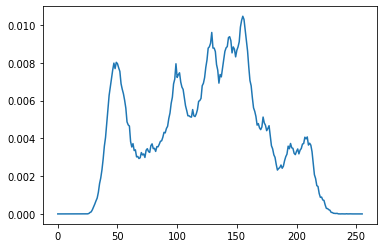

In [2]:
# 79-character line limit
######### ######### ######### ######### ######### ######### ######### #########
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

img_file = 'lena_gray_512.tif'

intensities = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
unique, counts = np.unique(intensities, return_counts=True)

height = np.shape(intensities)[0]
width = np.shape(intensities)[1]

u = unique.copy()
c = counts.copy()
for i in range(0,unique[-1]+1):
    if u[i] != i:
        u = np.insert(u,i,i)
        c = np.insert(c,i,0)

z = np.zeros(255-unique[-1])
all_counts = np.append(c,z)
a = np.array(range(unique[-1]+1, 256))
var = np.append(u,a)

occurance_sum = sum(all_counts)
prbs = all_counts/occurance_sum
# plt.plot(var, all_counts)
plt.plot(var, prbs)
plt.savefig('distribution')

# print(intensities)
cv2.imshow('orig_image',intensities)
cv2.waitKey(1000)
filename = 'compressed_org_img.webp'
cv2.imwrite(filename, intensities)
cv2.waitKey(1000)

cells_num = 256

all_yijs = []
all_dijs = []
all_prb0s = []
for i in range(0,cells_num-1):
    for j in range(i+1,cells_num):
        
        '''Choose the strategy'''
# Strategy1: Eve knows the source statistics which is rare in image encrytion
#         possible_yij = (var[i]*prbs[i]+var[j]*prbs[j])\ 
#                        /(prbs[i]+prbs[j])

# '''Choose one strategy'''
# # Strategy2: Eve knows the reconstruction value of each cell
#         possible_yij = (var[i]+var[j])/2
#         #possibel_yij = random.choice([var[i],var[j]])
        
#         all_yijs = np.append(all_yijs, possible_yij)
        
#         possible_dij\
#         = var[i]**2*prbs[i] + possible_yij**2*prbs[i] - possible_yij*2*var[i]*prbs[i]\
#         + var[j]**2*prbs[j] + possible_yij**2*prbs[j] - possible_yij*2*var[j]*prbs[j]
        
# Strategy3
        yi = var[i]
        yj = var[j]
        possible_dij = 0.5*(
          var[i]**2*prbs[i] + yi**2*prbs[i] - yi*2*var[i]*prbs[i]\
        + var[j]**2*prbs[j] + yi**2*prbs[j] - yi*2*var[j]*prbs[j]\
        + var[i]**2*prbs[i] + yj**2*prbs[i] - yj*2*var[i]*prbs[i]\
        + var[j]**2*prbs[j] + yj**2*prbs[j] - yj*2*var[j]*prbs[j])
        
               
        all_dijs = np.append(all_dijs, possible_dij)
                
        possible_prb0 = max(prbs[j],prbs[i])
        all_prb0s = np.append(all_prb0s, possible_prb0)

######### ######### ######### ######### ######### ######### ######### #########
'''For distortion and entropy, we must implement the integer linear programming.'''
'''Linear programming does not results in binary values'''
from mip import Model, xsum, maximize, BINARY

all_length = int(cells_num * (cells_num-1) / 2)

A_eq = np.zeros([cells_num, all_length])
k = 0
for i in range(0, cells_num-1):
    for j in range(i+1,cells_num):
        A_eq[i,k]=1
        k+=1
k = 0
for j in range(1, cells_num):
    for i in range (j,cells_num):
        A_eq[i,k]=1
        k+=1

b_eq = np.ones([cells_num,])

# MIP NB

In [4]:
######### ######### ######### ######### ######### ######### ######### #########
# NBIA
nb_all_yijs = []
nb_all_dijs = []
power = np.log2(cells_num)
for i in range(0,int(cells_num/2)):
    j = int(cells_num/2 + i)
#     print(i,j)

    '''Choose the strategy'''
# Strategy2
#     nb_yij = (var[i]+var[j])/2 # Strategy2
#     nb_all_yijs = np.append(nb_all_yijs, nb_yij) # Strategy2
    
#     nb_dij\
#         = var[i]**2*prbs[i] + nb_yij**2*prbs[i] - nb_yij*2*var[i]*prbs[i]\
#         + var[j]**2*prbs[j] + nb_yij**2*prbs[j] - nb_yij*2*var[j]*prbs[j] # Strategy2


# Strategy3
    nb_dij = 0.5*(\
      var[i]**2*prbs[i] + var[i]**2*prbs[i] - var[i]*2*var[i]*prbs[i]\
    + var[j]**2*prbs[j] + var[i]**2*prbs[j] - var[i]*2*var[j]*prbs[j]\
    + var[i]**2*prbs[i] + var[j]**2*prbs[i] - var[j]*2*var[i]*prbs[i]\
    + var[j]**2*prbs[j] + var[j]**2*prbs[j] - var[j]*2*var[j]*prbs[j]) # Strategy3

    nb_all_dijs = np.append(nb_all_dijs, nb_dij)
    
nb_distortion = np.sum(nb_all_dijs)
nb_db = 10 * np.log10(nb_distortion)

nb_prb0s = prbs[0: int(cells_num/2)]  
nb_prb0 = sum(nb_prb0s)
nb_entropy = -nb_prb0*np.log2(nb_prb0)-(1-nb_prb0)*np.log2(1-nb_prb0)

# print('\n',nb_distortion)
print('nb_DE(dB)',nb_db)
print('nb_HS0',nb_entropy)

# NB MSB plane
nb_msb_plane = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        if true_val <= 127:
            nb_msb_plane[i][j] = 0 
        else:
            nb_msb_plane[i][j] = 1
            
nb_msb_plane255 = nb_msb_plane*255
nb_msb_uint8 = nb_msb_plane255.astype(np.uint8)
cv2.imshow('nb_msb_plane', nb_msb_uint8)
filename = 'nb_msb_plane_255.webp'
cv2.imwrite(filename, nb_msb_uint8)
cv2.waitKey(1000)
# At Eve ######### ######### ######### ######### ######### ######### ######### #########
eve_msb0 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        if intensities[i][j] >= 128:
            eve_msb0[i][j] = intensities[i][j]-128

diff1 = (intensities -  eve_msb0)
dif1 = diff1.astype(np.float)
eve_dist1_mat = dif1**2
eve_dist1 = eve_dist1_mat.sum()/occurance_sum

cv2.imshow('eve_msb0_nb', eve_msb0)
filename = 'eve_msb0_nb.webp'
cv2.imwrite(filename, eve_msb0)
cv2.waitKey(1000)

eve_msb1 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        if intensities[i][j] < 128:
            eve_msb1[i][j] = intensities[i][j]+128

diff2 = (intensities -  eve_msb1)
dif2 = diff2.astype(np.float)
eve_dist2_mat = dif2**2
eve_dist2 = eve_dist2_mat.sum()/occurance_sum

cv2.imshow('eve_msb1_nb', eve_msb1)
filename = 'eve_msb1_nb.webp'
cv2.imwrite(filename, eve_msb1)
cv2.waitKey(1000)

eve_dist = 0.5 * (eve_dist1 + eve_dist2)
eve_dist_db = 10*np.log10(eve_dist)
print('eve_distortion_1msb_nb', eve_dist_db)


nb_DE(dB) 39.133899436317556
nb_HS0 0.9996495266945231
eve_distortion_1msb_nb 39.133899436317556


In [5]:
cv2.destroyAllWindows()

# MIP LP Lambda 0

In [6]:
######### ######### ######### ######### ######### ######### ######### #########
Omega = 1
Lambda = 0

p = Omega * all_dijs + Lambda * all_prb0s
w = A_eq
c = 1
I = range(np.shape(w)[1])

m = Model('knapsack')

x = [m.add_var(var_type=BINARY) for i in I]

m.objective = maximize(xsum(p[i] * x[i] for i in I))

for j in range (0,cells_num):
    m += xsum(w[j][i] * x[i] for i in I) == c

opt_value = m.optimize()
       
# mip_xx = mip_xx + np.transpose(mip_xx)
# mip_yy = np.where(mip_xx)
# mip_zz = np.append(mip_yy[0],mip_yy[1])
# mip_pairs_show = np.reshape(mip_zz,[2,cells_num])
# mip_pairs_show = mip_pairs_show[:,0:int(cells_num/2)]

# print('\n', mip_pairs_show)
'''Do not run this cell, it takes time'''

'Do not run this cell, it takes time'

In [10]:
selected = [i for i in I if x[i].x >= 0.99]
# print('selected items: {}'.format(selected))

mip_pairs = []
for i in I:
    mip_pair = x[i].x
    mip_pairs = np.append(mip_pairs, mip_pair)
    
k = 0
mip_xx = np.zeros([cells_num, cells_num])
for i in range(0,cells_num):
    for j in range(i+1,cells_num):
        mip_xx[i,j] = mip_pairs[k]
        k +=1
        
mip_pairs_show = np.array(np.where(mip_xx == 1))

obj_value_db = 10*np.log10(m.objective_value)
# print(mip_pairs_show)
# print(m.objective_value)
print(obj_value_db)

39.4449389409017


In [13]:
mip_dijs = mip_pairs * all_dijs
mip_distortion = sum(mip_dijs)
mip_db = 10 * np.log10(mip_distortion)

mip_prb0s = mip_pairs * all_prb0s
mip_prb0 = sum(mip_prb0s)
if mip_prb0 == 0 or mip_prb0 == 1:
    mip_entropy = 0
else:
    mip_entropy = -mip_prb0 * np.log2(mip_prb0)-(1-mip_prb0)*np.log2(1-mip_prb0)

# print(opt_distortion)
print(mip_db)
print(mip_entropy)

39.4449389409017
0.6828902553492247


# MIP MSB plane Lambda 0

In [14]:
# MIP MSB plane Lambda 0
dual_mip_xx = mip_xx + np.transpose(mip_xx)

mip_msb_plane = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        mip_pair_val = np.array(np.where(dual_mip_xx[true_val]==1))
        if all_counts[true_val] >= all_counts[mip_pair_val]:
            mip_msb_plane[i][j] = 0
        else:
            mip_msb_plane[i][j] = 1

In [15]:
mip_msb_plane255 = mip_msb_plane*255
mip_msb_uint8 = mip_msb_plane255.astype(np.uint8)
cv2.imshow('mip_msb_plane_lam0', mip_msb_uint8)
filename = 'mip_msb_plane255_lam0.webp'
cv2.imwrite(filename, mip_msb_uint8)
cv2.waitKey(1000)

# mip_msb_plane255 = mip_msb_plane
# mip_msb_uint8 = mip_msb_plane255.astype(np.uint8)
# cv2.imshow('mip_msb_plane', mip_msb_uint8)
# filename = '1mip_msb_plane_lam0.webp'
# cv2.imwrite(filename, mip_msb_uint8)
# cv2.waitKey(1000)

-1

# Eve Side Lambda 0

In [39]:
# At Eve ######### ######### ######### ######### ######### ######### ######### #########
msb_pair1 = mip_pairs_show[0]
msb_pair2 = mip_pairs_show[1]

eve_msb0 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        paired_cell = np.where(dual_mip_xx[intensities[i][j]] == 1)
        if prbs[intensities[i][j]] < prbs[paired_cell]:
            eve_msb0[i][j] = paired_cell[0]
            
fintensities = intensities.astype(np.float)
feve_msb0 = eve_msb0.astype(np.float)
diff1 = fintensities - feve_msb0
eve_dist1_mat = diff1**2
eve_dist1 = eve_dist1_mat.sum()/occurance_sum

cv2.imshow('eve_msb0_lam0', eve_msb0)
filename = 'eve_msb0_lam0.webp'
cv2.imwrite(filename, eve_msb0)
cv2.waitKey(1000)

eve_msb1 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        paired_cell = np.where(dual_mip_xx[intensities[i][j]] == 1)
        if prbs[intensities[i][j]] > prbs[paired_cell]:
            eve_msb1[i][j] = paired_cell[0]

feve_msb1 = eve_msb1.astype(np.float)            
diff2 = fintensities - feve_msb1
eve_dist2_mat = diff2**2
eve_dist2 = eve_dist2_mat.sum()/occurance_sum

cv2.imshow('eve_msb1_lam0', eve_msb1)
filename = 'eve_msb1_lam0.webp'
cv2.imwrite(filename, eve_msb1)
cv2.waitKey(1000)

eve_dist = 0.5 * (eve_dist1 + eve_dist2)
eve_dist_db = 10*np.log10(eve_dist)
print('eve_distortion_msb_lam0', eve_dist_db)

eve_distortion_msb_lam0 39.4449389409017


In [55]:
eve_msb0

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [40]:
cv2.destroyAllWindows()

# MIP LP Lambda 1000

In [44]:
######### ######### ######### ######### ######### ######### ######### #########
Omega = 1
Lambda = 1000

p = Omega * all_dijs + Lambda * all_prb0s
w = A_eq
c = 1
I = range(np.shape(w)[1])

m = Model('knapsack')

x = [m.add_var(var_type=BINARY) for i in I]

m.objective = maximize(xsum(p[i] * x[i] for i in I))

for j in range (0,cells_num):
    m += xsum(w[j][i] * x[i] for i in I) == c

opt_value = m.optimize()
       
# mip_xx = mip_xx + np.transpose(mip_xx)
# mip_yy = np.where(mip_xx)
# mip_zz = np.append(mip_yy[0],mip_yy[1])
# mip_pairs_show = np.reshape(mip_zz,[2,cells_num])
# mip_pairs_show = mip_pairs_show[:,0:int(cells_num/2)]

# print('\n', mip_pairs_show)
'''Do not run this cell, it takes time'''

'Do not run this cell, it takes time'

In [45]:
selected = [i for i in I if x[i].x >= 0.99]
# print('selected items: {}'.format(selected))

mip_pairs = []
for i in I:
    mip_pair = x[i].x
    mip_pairs = np.append(mip_pairs, mip_pair)
    
k = 0
mip_xx = np.zeros([cells_num, cells_num])
for i in range(0,cells_num):
    for j in range(i+1,cells_num):
        mip_xx[i,j] = mip_pairs[k]
        k +=1
        
mip_pairs_show = np.array(np.where(mip_xx == 1))

obj_value_db = 10*np.log10(m.objective_value)
# print(mip_pairs_show)
# print(m.objective_value)
print(obj_value_db)

59.197157722018616


In [46]:
mip_dijs = mip_pairs * all_dijs
mip_distortion = sum(mip_dijs)
mip_db = 10 * np.log10(mip_distortion)

mip_prb0s = mip_pairs * all_prb0s
mip_prb0 = sum(mip_prb0s)
if mip_prb0 == 0 or mip_prb0 == 1:
    mip_entropy = 0
else:
    mip_entropy = -mip_prb0 * np.log2(mip_prb0)-(1-mip_prb0)*np.log2(1-mip_prb0)

# print(opt_distortion)
print(mip_db)
print(mip_entropy)

39.42475330892509
0.6746654160331109


# MIP MSB plane Lambda 1000

In [47]:
# MIP MSB plane Lambda 1000
dual_mip_xx = mip_xx + np.transpose(mip_xx)

mip_msb_plane = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        mip_pair_val = np.array(np.where(dual_mip_xx[true_val]==1))
        if all_counts[true_val] >= all_counts[mip_pair_val]:
            mip_msb_plane[i][j] = 0
        else:
            mip_msb_plane[i][j] = 1

In [48]:
mip_msb_plane255 = mip_msb_plane*255
mip_msb_uint8 = mip_msb_plane255.astype(np.uint8)
cv2.imshow('mip_msb_plane_lam1000', mip_msb_uint8)
filename = 'mip_msb_plane255_lam1000.webp'
cv2.imwrite(filename, mip_msb_uint8)
cv2.waitKey(1000)

# mip_msb_plane255 = mip_msb_plane
# mip_msb_uint8 = mip_msb_plane255.astype(np.uint8)
# cv2.imshow('mip_msb_plane', mip_msb_uint8)
# filename = '1mip_msb_plane_lam0.webp'
# cv2.imwrite(filename, mip_msb_uint8)
# cv2.waitKey(1000)

-1

# Eve Side Lambda 1000

In [49]:
# At Eve ######### ######### ######### ######### ######### ######### ######### #########
msb_pair1 = mip_pairs_show[0]
msb_pair2 = mip_pairs_show[1]

eve_msb0 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        paired_cell = np.where(dual_mip_xx[intensities[i][j]] == 1)
        if prbs[intensities[i][j]] < prbs[paired_cell]:
            eve_msb0[i][j] = paired_cell[0]
            
fintensities = intensities.astype(np.float)
feve_msb0 = eve_msb0.astype(np.float)
diff1 = fintensities - feve_msb0
eve_dist1_mat = diff1**2
eve_dist1 = eve_dist1_mat.sum()/occurance_sum

cv2.imshow('eve_msb0_lam1000', eve_msb0)
filename = 'eve_msb0_lam1000.webp'
cv2.imwrite(filename, eve_msb0)
cv2.waitKey(1000)

eve_msb1 = intensities.copy()
for i in range(0,height):
    for j in range(0,width):
        paired_cell = np.where(dual_mip_xx[intensities[i][j]] == 1)
        if prbs[intensities[i][j]] > prbs[paired_cell]:
            eve_msb1[i][j] = paired_cell[0]

feve_msb1 = eve_msb1.astype(np.float)            
diff2 = fintensities - feve_msb1
eve_dist2_mat = diff2**2
eve_dist2 = eve_dist2_mat.sum()/occurance_sum

cv2.imshow('eve_msb1_lam1000', eve_msb1)
filename = 'eve_msb1_lam1000.webp'
cv2.imwrite(filename, eve_msb1)
cv2.waitKey(1000)

eve_dist = 0.5 * (eve_dist1 + eve_dist2)
eve_dist_db = 10*np.log10(eve_dist)
print('eve_distortion_msb_lam1000', eve_dist_db)

eve_distortion_msb_lam1000 39.42475330892509


In [50]:
cv2.destroyAllWindows()

# MIP Encryption

In [147]:
dual_mip_xx = mip_xx + np.transpose(mip_xx)

mip_enc_intens = np.zeros([height,width])
for i in range(0,height):
    for j in range(0,width):
        true_val = intensities[i][j]
        pair_val = np.array(np.where(dual_mip_xx[true_val]==1))
        paired_vals = [true_val, pair_val]
        mip_enc_intens[i][j] = random.choice(paired_vals)

NameError: name 'mip_xx' is not defined

In [95]:
print(mip_pairs_show-pairs)
munique, mcounts = np.unique(mip_pairs, return_counts=True)
print(munique, mcounts)
lpunique, lpcounts = np.unique(opt_pairs, return_counts=True)
print(lpunique, lpcounts)
'''The results of linear programming was correct, then integer linear programming must be used'''

NameError: name 'pairs' is not defined